In [1]:
import pandas as pd

In [2]:
import numpy as np


In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
dfir=pd.read_csv(R"C:\Users\ny691\Downloads\archive (2)\iris.csv")

In [6]:
dfir

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### checking nan

In [7]:
dfir.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

###  Error detection

<AxesSubplot:>

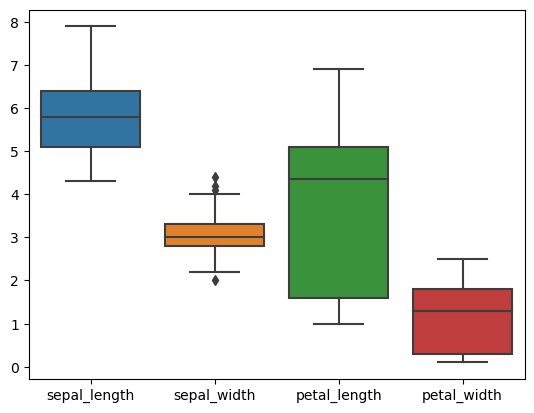

In [8]:
sns.boxplot(data=dfir)

C:\Users\ny691\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


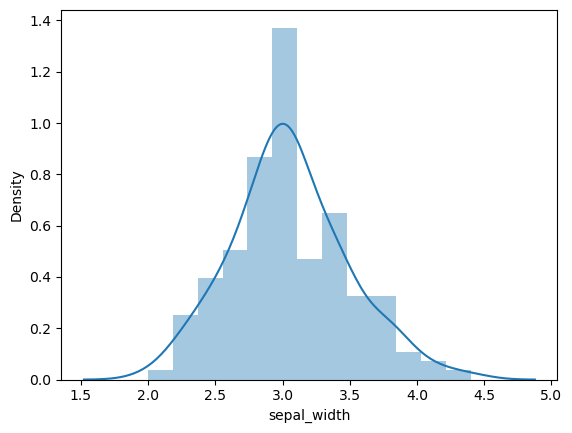

In [10]:
sns.distplot(dfir["sepal_width"])
plt.show()

In [11]:
dfir["sepal_width"].skew().round()

0.0

### mean std - method

In [12]:
dfir["sepal_width"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [20]:
m=dfir["sepal_width"].mean()

In [21]:
s=dfir["sepal_width"].std()

In [22]:
lower=m-(3*s)

In [23]:
upper=m+(3*s)

In [24]:
lower

1.7532170659134796

In [25]:
upper

4.354782934086522

In [26]:
dfir[(dfir["sepal_width"]<lower) | (dfir["sepal_width"]>upper)]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa


In [27]:
dfir["sepal_width"]=dfir["sepal_width"].map(lambda b :m if b>lower else m if b>upper else b)

In [29]:
dfir[(dfir["sepal_width"]<lower) | (dfir["sepal_width"]>upper)]


,sepal_length,sepal_width,petal_length,petal_width,species


### Encoding

In [30]:
dfir.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
lab=LabelEncoder()

In [33]:
lab.fit(dfir["species"])

LabelEncoder()

In [34]:
lab.transform(dfir["species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
dfir["species"]=lab.transform(dfir["species"])

In [36]:
dfir

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.054,1.4,0.2,0
1,4.9,3.054,1.4,0.2,0
2,4.7,3.054,1.3,0.2,0
3,4.6,3.054,1.5,0.2,0
4,5.0,3.054,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.054,5.2,2.3,2
146,6.3,3.054,5.0,1.9,2
147,6.5,3.054,5.2,2.0,2
148,6.2,3.054,5.4,2.3,2


### separation data

In [37]:
x=dfir.drop("species",axis=1)

In [38]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.054,1.4,0.2
1,4.9,3.054,1.4,0.2
2,4.7,3.054,1.3,0.2
3,4.6,3.054,1.5,0.2
4,5.0,3.054,1.4,0.2
...,...,...,...,...
145,6.7,3.054,5.2,2.3
146,6.3,3.054,5.0,1.9
147,6.5,3.054,5.2,2.0
148,6.2,3.054,5.4,2.3


In [39]:
x.shape

(150, 4)

In [40]:
y=dfir["species"]

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [42]:
y.shape

(150,)

### Imbalance

In [43]:
y.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

<AxesSubplot:>

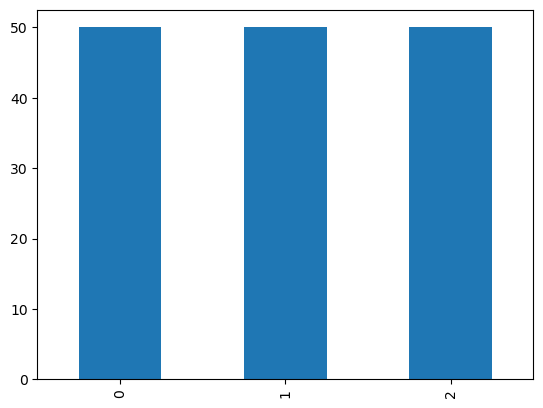

In [44]:
y.value_counts().plot(kind="bar")

### spliting Data

In [55]:
import warnings 

In [57]:
warnings.filterwarnings("ignore")

In [45]:
from sklearn.model_selection import train_test_split

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
knn=KNeighborsClassifier()
svr=SVC()
lgr=LogisticRegression()
dtrc=DecisionTreeClassifier()
adc=AdaBoostClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
xgbc=XGBClassifier()

In [50]:
mclist=[knn,svr,lgr,dtrc,adc,rfc,gbc,xgbc]

In [63]:
for mc in mclist:
    cl=[]
    for i in range(1,51):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
        mc.fit(x_train,y_train)
        s=mc.score(x_test,y_test)
        cl.append(s)
    print(cl)
    print(max(cl))
    print(mc)
    print("random_state : ",cl.index(max(cl))+1)
    
    print(cl.index(max(cl)))

[1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9, 0.9, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9333333333333333]
1.0
KNeighborsClassifier()
random_state :  1
0
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9333333333333333, 1.0, 1.0, 0.9333333333333333, 0.96666666666666